In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from google.colab import files
from Imputers import SimpleImputer

In [ ]:
bi_data= pd.read_csv("BI.Final.Exam.Dataset.csv")

In [ ]:
bi_data.shape

(27891, 38)

In [ ]:
bi_data.isnull().sum()

,0
encounter_Id,0
encounter_START,0
encounter_STOP,0
patient_Id,0
payer_Id,0
encounter_ENCOUNTERCLASS,0
encounter_CODE,0
encounter_DESCRIPTION,0
encounter_BASE_ENCOUNTER_COST,0
encounter_TOTAL_CLAIM_COST,0


In [ ]:
bi_data=bi_data.drop(['encounter_Id','encounter_CODE','encounter_REASONCODE','encounter_REASONDESCRIPTION','patient_BIRTHDATE','patient_DEATHDATE','patient_PREFIX','patient_SUFFIX','patient_MAIDEN','patient_ETHNICITY','patient_BIRTHPLACE','patient_ADDRESS','payer_ADDRESS','payer_PHONE'],axis=1)

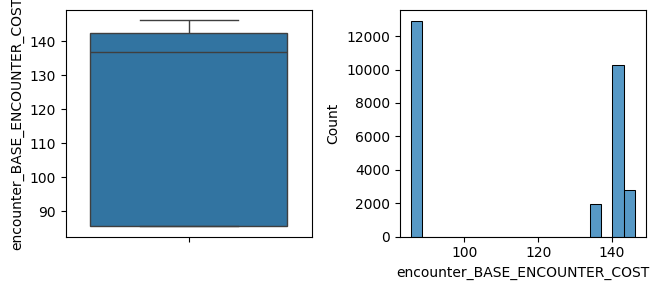

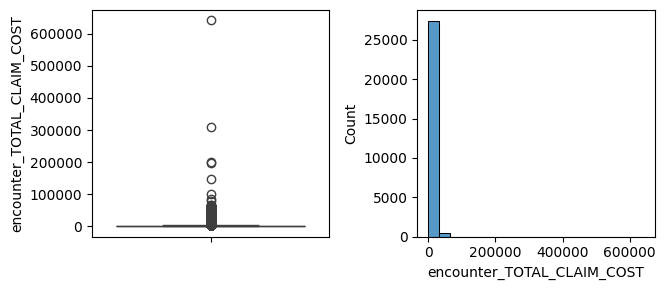

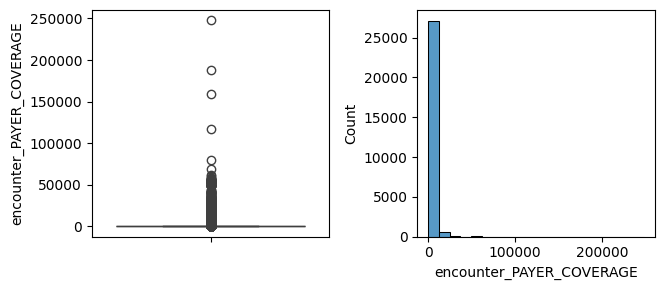

In [ ]:
numerical_cols = bi_data[['encounter_BASE_ENCOUNTER_COST','encounter_TOTAL_CLAIM_COST','encounter_PAYER_COVERAGE']]
for column in numerical_cols:
    plot.figure(figsize=(10, 3))

    # Box plot
    plot.subplot(1, 3, 1)
    sns.boxplot(y=bi_data[column])
   # plot.title(f'Box Plot of {column}')
    #histogram
    plot.subplot(1,3,2)
    sns.histplot(bi_data[column],bins=20, kde=False)
    #plot.title(f'histogram of {column}')

    plot.tight_layout()
    plot.show()

In [ ]:
bi_data.isnull().sum()

,0
encounter_START,0
encounter_STOP,0
patient_Id,0
payer_Id,0
encounter_ENCOUNTERCLASS,0
encounter_DESCRIPTION,0
encounter_BASE_ENCOUNTER_COST,0
encounter_TOTAL_CLAIM_COST,0
encounter_PAYER_COVERAGE,0
patient_FIRST,0


In [ ]:
bi_data[['payer_CITY','payer_STATE_HEADQUARTERED','payer_ZIP']] = bi_data[['payer_CITY','payer_STATE_HEADQUARTERED','payer_ZIP']].fillna('no insurance')

In [ ]:
bi_data= bi_data.drop(['patient_ZIP'],axis=1)

In [ ]:
bi_data=bi_data.drop(['patient_MARITAL'],axis=1)

In [ ]:
bi_data.to_excel("Cleaned_bi_data.xlsx", index=False)
files.download("Cleaned_bi_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
corr_cols=bi_data[['encounter_BASE_ENCOUNTER_COST','encounter_TOTAL_CLAIM_COST','encounter_PAYER_COVERAGE','']]
correlation_matrix = corr_cols.corr()

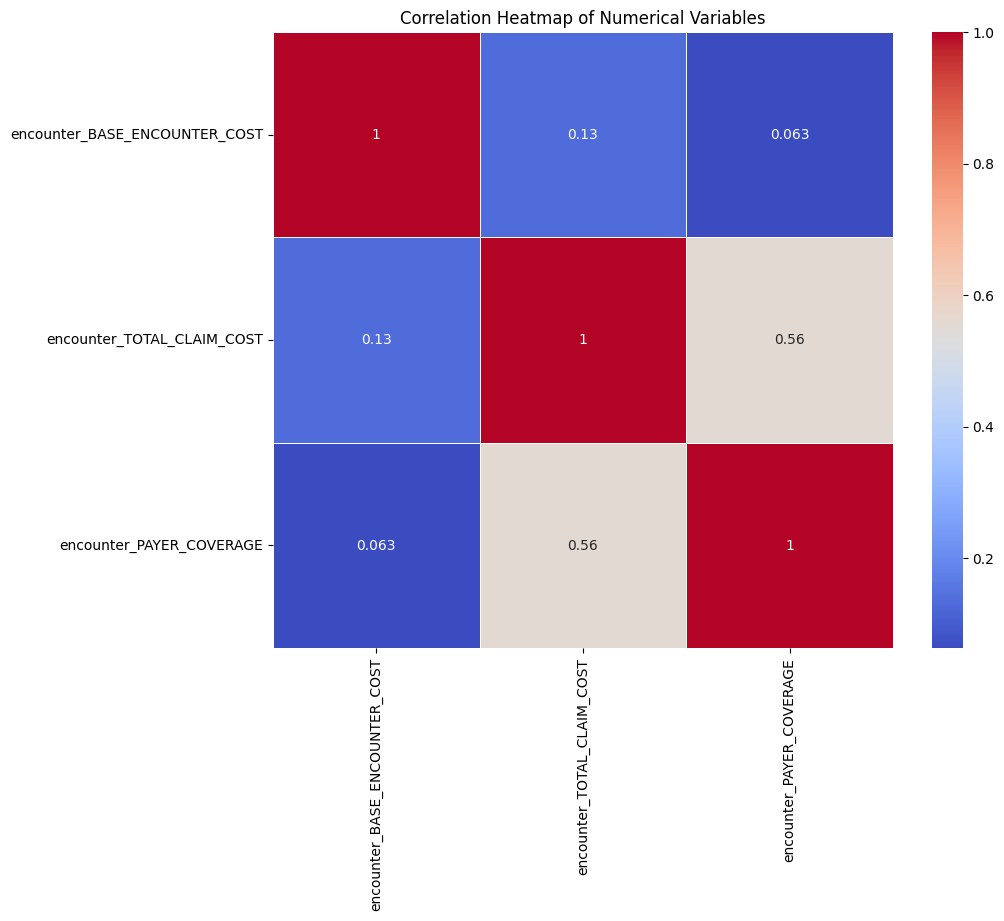

In [ ]:
plot.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plot.title("Correlation Heatmap of Numerical Variables")
plot.show()